In [20]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [21]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

In [3]:
graph_builder = StateGraph(State)
graph_builder


In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
llm = ChatGroq(model="openai/gpt-oss-120b")

In [6]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [7]:

graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

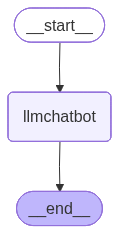

In [8]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [27]:
response=graph.invoke({"messages":"Hi"})

In [37]:
response['messages'][1].content

'Hello! How can I help you today?'

In [38]:
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='fb6f0f3e-7ffa-48f6-9dba-9bdf139a0714'),
  AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'User says "Hi". Need to respond. Should be friendly.'}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 72, 'total_tokens': 104, 'completion_time': 0.066539219, 'completion_tokens_details': {'reasoning_tokens': 14}, 'prompt_time': 0.003213072, 'prompt_tokens_details': None, 'queue_time': 0.049398268, 'total_time': 0.069752291}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_df42644058', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1de4-dc68-7ce2-8925-f21747f19cc7-0', usage_metadata={'input_tokens': 72, 'output_tokens': 32, 'total_tokens': 104, 'output_token_details': {'reasoning': 14}})]}

In [42]:
response=graph.invoke({"messages":"how are u doing"})
response

{'messages': [HumanMessage(content='how are u doing', additional_kwargs={}, response_metadata={}, id='e6437df0-8afe-46ac-8e09-69b7a373892b'),
  AIMessage(content="I'm doing great, thanks for asking! How can I help you today?", additional_kwargs={'reasoning_content': 'The user asks "how are u doing". It\'s a casual greeting. We respond politely. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 75, 'total_tokens': 122, 'completion_time': 0.13339035, 'completion_tokens_details': {'reasoning_tokens': 23}, 'prompt_time': 0.002793534, 'prompt_tokens_details': None, 'queue_time': 0.052803375, 'total_time': 0.136183884}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1df1-8903-7b02-bdcb-b1dcf522d0e5-0', usage_metadata={'input_tokens': 75, 'output_tokens': 47, 'total_tokens': 122, 'output_token_details': 

In [40]:
response["messages"]

[HumanMessage(content='how are u doing', additional_kwargs={}, response_metadata={}, id='6959e24f-8307-4d7a-981b-ee31a86cfe73'),
 AIMessage(content="I'm doing great, thanks for asking! How about you? Anything I can help you with today?", additional_kwargs={'reasoning_content': 'The user says "how are u doing". This is a casual greeting. We should respond politely, ask how they are, maybe ask if they need help. No policy issues. Use friendly tone.'}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 75, 'total_tokens': 145, 'completion_time': 0.149833115, 'completion_tokens_details': {'reasoning_tokens': 41}, 'prompt_time': 0.002757494, 'prompt_tokens_details': None, 'queue_time': 0.053594725, 'total_time': 0.152590609}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b1dee-3125-7531-9433-1ce26b91b255-0', usage_metadata=

In [47]:
for event in graph.stream({"messages":"hi how are u"}):
    for value in event.values():
        print(value['messages'][-1].content)

Hey there! I'm doing great, thanks for asking. How can I help you today?


In [48]:
from langchain_core.messages import HumanMessage, AIMessage

In [50]:
state = {
    "messages": [
        HumanMessage(content="my name is ritika"),
        AIMessage(content="okay understood"),
        HumanMessage(content="what is my name")
    ]
}

response = graph.invoke(state)



In [52]:
response["messages"][-1].content

'Your name is **Ritika**. Let me know if there’s anything else you’d like to discuss!'

## tools 

In [15]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.1-8b-instant")

In [3]:
from langchain_tavily import TavilySearch

search=TavilySearch(max_results=2)
res = search.invoke("tell me the recent ai news taking place")

In [11]:
## Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [12]:

tools=[search,multiply]

In [17]:
llm_with_tool=llm.bind_tools(tools)

In [18]:
llm_with_tool

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000002A9A7B490D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002A9A7E90390>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input sho

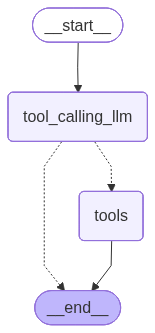

In [22]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
response = graph.invoke({"messages":"tell me the recent ai news"})
response['messages'][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.bloomberg.com/news/articles/2025-12-14/wall-street-sees-an-ai-bubble-forming-and-is-gaming-what-pops-it", "title": "Wall Street Sees an AI Bubble Forming and Is Gaming What Pops It - Bloomberg.com", "score": 0.6765563, "published_date": "Sun, 14 Dec 2025 14:00:00 GMT", "content": "# Wall Street Sees AI Bubble Coming and Is Betting on What Pops It. Provide news feedback or report an error. Send a tip to our reporters. It’s been three years since OpenAI set off euphoria over artificial intelligence with the release of ChatGPT. And while the money is still pouring in, so are the doubts about whether the good times can last. From a recent selloff in the shares of Nvidia Corp., to Oracle Corp.’s plunge after reporting mounting spending on AI, to souring sentiment around a network of companies exposed to OpenAI, signs of skepticism are increasing. Looking to 2026, the deba

In [26]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

tell me the recent ai news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (z8rwyp60s)
 Call ID: z8rwyp60s
  Args:
    query: recent ai news
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.bloomberg.com/news/articles/2025-12-14/wall-street-sees-an-ai-bubble-forming-and-is-gaming-what-pops-it", "title": "Wall Street Sees an AI Bubble Forming and Is Gaming What Pops It - Bloomberg.com", "score": 0.6765563, "published_date": "Sun, 14 Dec 2025 14:00:00 GMT", "content": "# Wall Street Sees AI Bubble Coming and Is Betting on What Pops It. Provide news feedback or report an error. Send a tip to our reporters. It’s been three years since OpenAI se

In [27]:
response = graph.invoke({"messages":"what is 5 multiplied by 5"})
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is 5 multiplied by 5
================================== Ai Message ==================================
Tool Calls:
  multiply (39fw8x6rv)
 Call ID: 39fw8x6rv
  Args:
    a: 5
    b: 5
================================= Tool Message =================================
Name: multiply

25
